# Part 1 - Importing libriries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 2 - Importing the dataset

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Part 3 - Exploratory Data Analysisi

## Part 3.1 - Missing Data

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


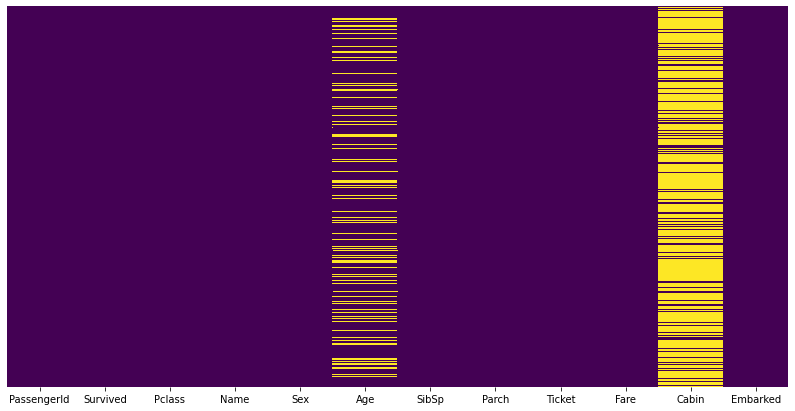

In [5]:
plt.figure(figsize = (14, 7))
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

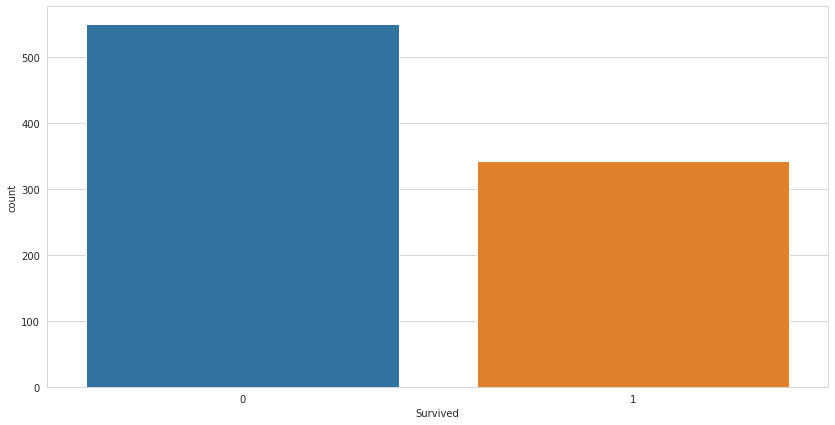

In [6]:
plt.figure(figsize = (14, 7))
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

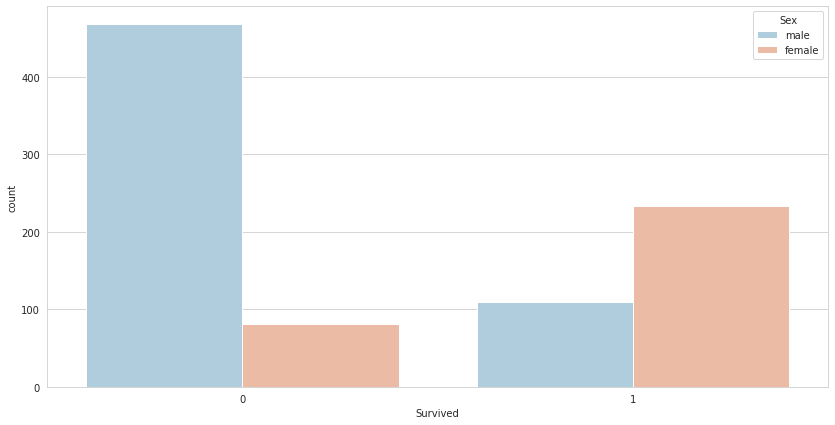

In [7]:
plt.figure(figsize = (14, 7))
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

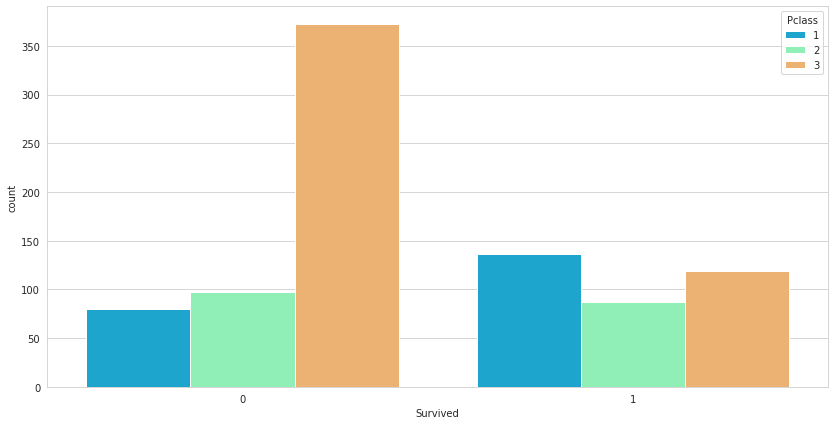

In [8]:
plt.figure(figsize = (14, 7))
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow', )

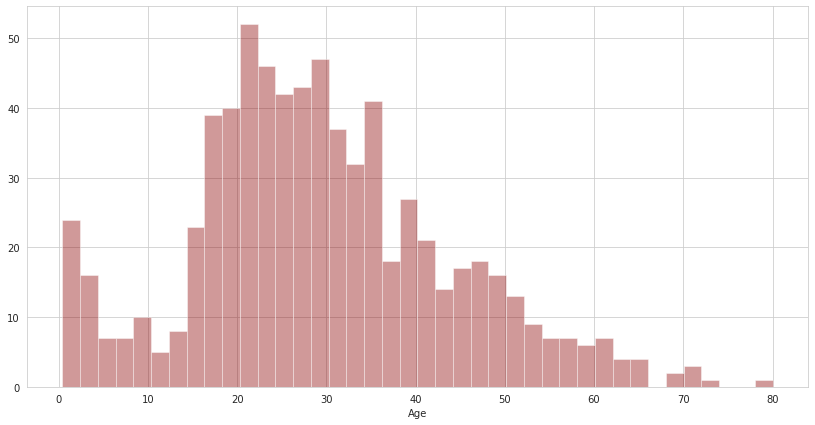

In [9]:
plt.figure(figsize = (14, 7))
sns.distplot(train['Age'].dropna(), kde = False, color = 'darkred', bins = 40)

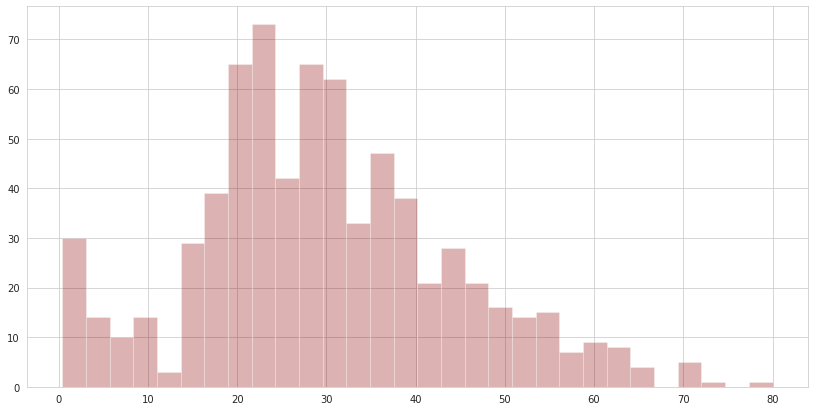

In [10]:
plt.figure(figsize = (14, 7))
train['Age'].hist(bins = 30, color = 'darkred', alpha = 0.3)

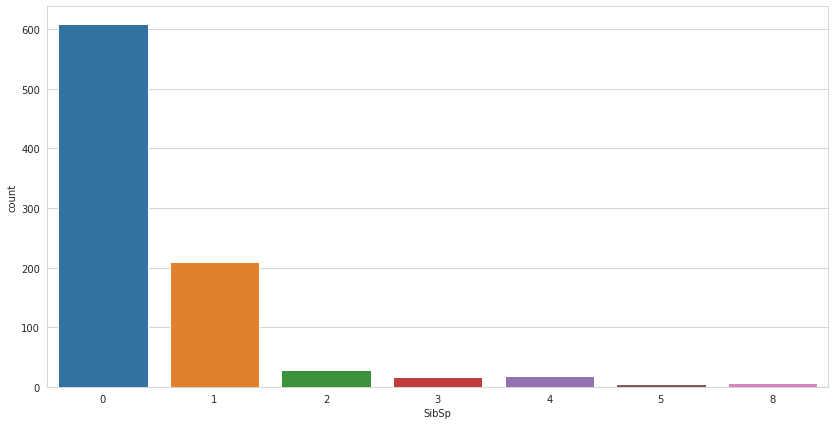

In [11]:
plt.figure(figsize = (14, 7))
sns.countplot(x = 'SibSp', data = train)

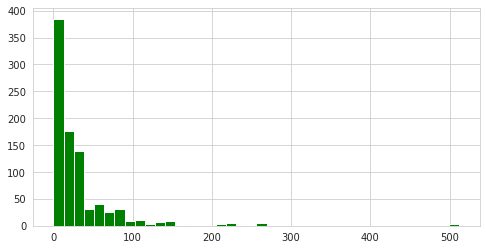

In [12]:
plt.figure(figsize = (14, 7))
train['Fare'].hist(color = 'green', bins = 40, figsize = (8, 4))

## Part 3.2 - Data Cleaning

### Part 3.2.1 - Age Column

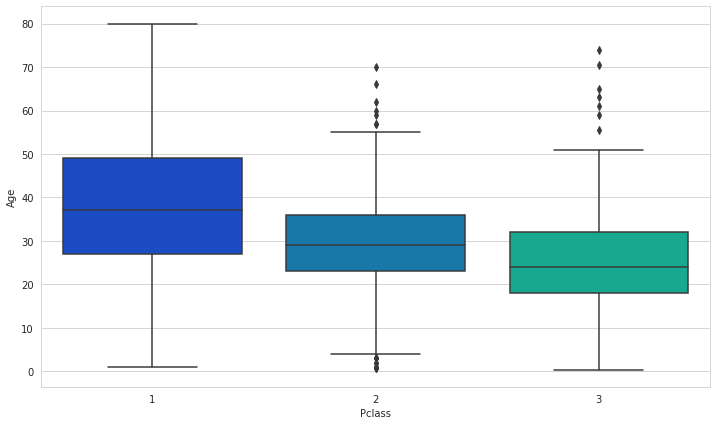

In [13]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

In [14]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29

        else:
            return 24

    else: return Age

In [15]:
train['Age'] = train[['Age', 'Pclass']].apply(input_age, axis = 1)

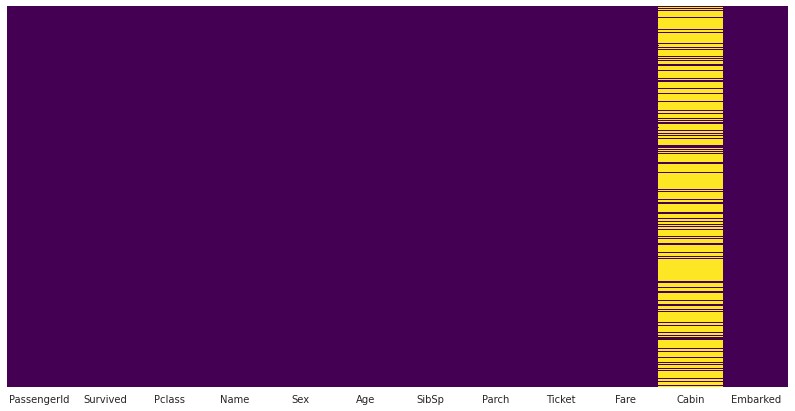

In [16]:
plt.figure(figsize = (14, 7))
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

### Part 3.2.2 - Cabin Column

In [17]:
train.drop('Cabin', axis = 1, inplace = True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Part 3.2.3 - Creating *'Family'* column by adding SibSp & Parch Column

In [19]:
train['Family'] = 0

In [20]:
train['Family'] = train['SibSp'] + train['Parch']

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


### Part 3.2.4 - Removing the missing values

In [22]:
train.dropna(inplace = True)

## Part 3.3 - Converting Categorical Features

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Family       889 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


### Part 3.3.1 - Embarked Column

In [24]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

### Part 3.3.2 - Sex Column

In [25]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

### Part 3.3.3 - Editing the dataset

In [26]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId','SibSp','Parch'], axis = 1, inplace = True)

In [27]:
train.head()

,Survived,Pclass,Age,Fare,Family
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


In [28]:
train = pd.concat([train, sex, embark], axis = 1)

In [29]:
train.head()

,Survived,Pclass,Age,Fare,Family,male,Q,S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


## Part 3.4 - Removing Outliers

In [30]:
train.describe()

,Survived,Pclass,Age,Fare,Family,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,32.096681,0.906637,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.209814,49.697504,1.614703,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,14.454200,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,31.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000,1.000000,1.000000,1.000000


### Part 3.4.1 - Removing Outliers from Age column

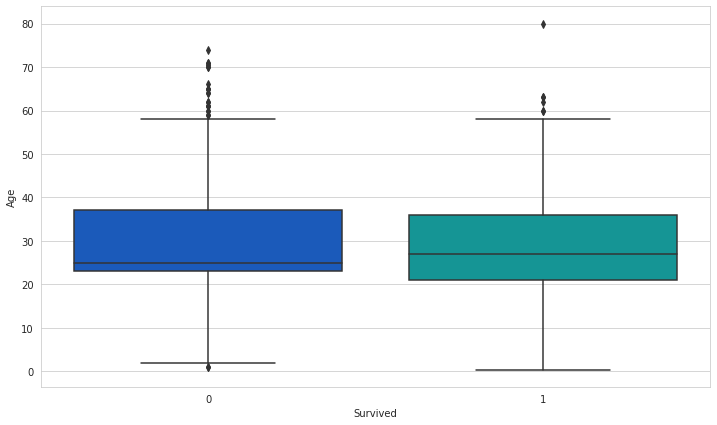

In [31]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Survived', y = 'Age', data = train, palette = 'winter')

In [32]:
Q1_Age = train.Age.quantile(0.25)
Q3_Age = train.Age.quantile(0.75)
Q1_Age, Q3_Age

(22.0, 36.5)

In [33]:
IQR_Age = Q3_Age - Q1_Age
IQR_Age

14.5

In [34]:
lower_limit_Age = Q1_Age - 1.5 * IQR_Age
upper_limit_Age = Q3_Age + 1.5 * IQR_Age
lower_limit_Age, upper_limit_Age

(0.25, 58.25)

In [35]:
train = train[(train.Age > lower_limit_Age) & (train.Age < upper_limit_Age)]
train.shape

(862, 8)

### Part 3.4.2 - Removing outliers from Fare Column

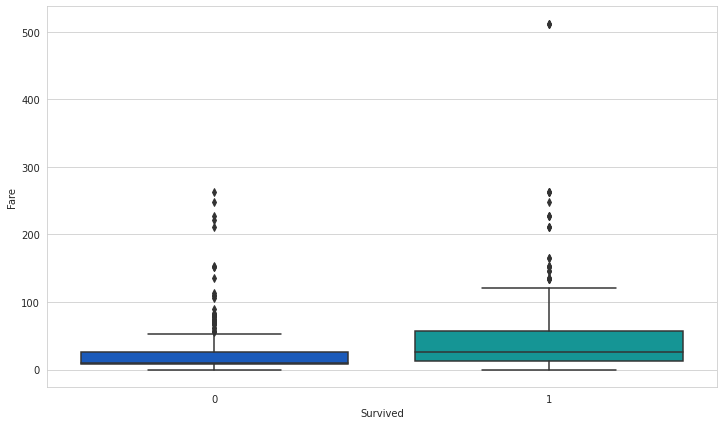

In [36]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Survived', y = 'Fare', data = train, palette = 'winter')

In [37]:
max_thresold_Fare = train['Fare'].quantile(0.95)
min_thresold_Fare = train['Fare'].quantile(0.05)
max_thresold_Fare, min_thresold_Fare

(113.15541499999985, 7.225)

In [39]:
print(train[train['Fare'] > max_thresold_Fare].shape)
print(train[train['Fare'] < min_thresold_Fare].shape)

(44, 8)
(42, 8)


In [40]:
train = train[(train['Fare'] < max_thresold_Fare) & (train['Fare'] > min_thresold_Fare)]

In [41]:
train.shape

(764, 8)

# Part 4 - Building a Logistic Regression Model

## Part 4.1 - Spliting the dataset into X and y

In [42]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

## Part 4.2 - Spliting the dataset into training and testing dataset

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Part 4.3 - Training Model

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Part 4.4 - Predicting the model

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
accuracy = confusion_matrix(y_test, y_pred)

In [51]:
accuracy

array([[77, 12],
       [23, 41]])

## Part 4.5 - Accuracy Score

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test, y_pred)

0.7712418300653595

- So, by using LogisticRegression Model, the accuracy score on the test dataset is around **77.12%** using *random_state* = 0 and *test_size* = 0.2.

# Part 5 - Building the ANN Model

## Part 5.1 - Feature Scalling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Part 5.2 - Importing libraries for ANN

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Part 5.3 - Initializing the ANN

In [100]:
model = Sequential()

## Part 5.4 - Adding the input layer and the first hidden layer

In [101]:
model.add(Dense(units = 7, activation = 'relu', input_dim = X_train.shape[1]))

## Part 5.5 - Adding the second hidden layer

In [102]:
model.add(Dense(units = 10, activation = 'relu'))

## Part 5.6 - Adding the third hidden layer(optional)

In [103]:
model.add(Dense(units = 6, activation = 'relu'))

## Part 5.7 - Adding the output layer

In [104]:
model.add(Dense(units=1, activation = 'sigmoid'))

## Part 5.7 - Training the ANN

### Part 5.7.1 - Compiling the ANN

In [105]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Part 5.7.2 - Training the ANN on the Training set

In [106]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 1000)

Epoch 1/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.4501
Epoch 2/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.6579
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.7169
Epoch 4/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.7610
Epoch 5/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.7610
Epoch 6/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.7791
Epoch 7/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.7856
Epoch 8/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5503 - accuracy: 0.7872
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.8085
Epoch 10/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.8118

## Part 5.8 - Making the predictions

In [107]:
y_pred = model.predict_classes(X_test)

## Part 5.9 - Accuracy Score

In [108]:
accuracy_score(y_test, y_pred)

0.7973856209150327

# Part 6 - Results

- There are **2 hidden layers** (1st hidden layers has *7 units*, activation function as *relu* and the 2nd hidden layer has *10 units* and activation function as *relu*), the **output layer** (having activation function *'sigmoid'*) and **compiling** with *adam* optimizer and *binary_crossentropy* loss. Then **trained** the model with *batch_size* = 32 and *epochs* = 1000. This model givies the **accuracy score** around <u style = "color : red">**79.73%**</u>.